# Hands-on Project

<span style="color:red">**Question 1:** </span> List the dataset(s) you chose for this project from the [UCI Machine Learning respository](https://archive.ics.uci.edu/ml/datasets.php).

Dataset : Abalone ( https://archive.ics.uci.edu/ml/datasets/Abalone )

<span style="color:red">**Question 2:** </span> Describe the dataset in your own words. How many data points, how many attributes, how many types of attributes, how many classes (if any)? Who collected it? How was it collected?

Abalone is a common name for any of a group of small to very large sea snails, marine gastropod molluscs. The meat (foot muscle) of abalone is used for food, and the shells of abalone are used as decorative items and as a source of mother of pearl for jewelry, buttons, buckles, and inlay. The age of abalone is of importance here because its age determines the price. Shell of abalone has rings on it using which the age is calculated. Calculating the age involves a complex process of cutting the shell, staining it and counting number of rings through microscope. <br> 
This dataset has physical measurements of abalone by which a model has to be developed to predict the number of rings and thus age of abalone. <br>

Attributes : <br>
Sex - nominal - M(male), F(female), and I (infant) <br>
Length(mm) - continuous -Longest shell measurement <br>
Diameter(mm) - continuous - perpendicular to length <br>
Height(mm) - continuous - with meat in shell <br>
Whole weight(grams) - continuous - whole abalone weight <br>
Shucked weight(grams) - continuous - weight of meat <br>
Viscera weight(grams) - continuous - gut weight (after bleeding) <br>
Shell weight(grams) - continuous - after being dried <br>
Rings / integer - +1.5 gives the age in years <br>

For this analysis, we categorize number of ring values to 3 and 10 different classes and compare the these 2 cases with different models learned in this course. <br>

Data Source : 
Data comes from an original (non-machine-learning) study:Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and Wes B Ford (1994) <br>
"The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288)


<span style="color:red">**Question 3:** </span> What is your goal? Specifically, what insights do you want to learn from this data. Please be aware that clustering, classification, or itemset mining are not 'insights'. These are data mining tasks. Insights are relevant to the domain from which the data is generated.

Goal is to predict the age category of an abalone given its physical measurements. I would like to explore the following : 

1. How are attributes related with each other in determining the number of rings of alabone
2. How will different clustering algorithms perform in defining clusters with respect to 3 age ranges(Young, Adult, Old). 
3. How are different classification algorithms performing in achieving this goal (with 10 Classes and 3 Classes)

<span style="color:red">**Question 4:** </span> List the data mining task(s) and the specific algorithms you want to perform on this data. Do not pick the tasks listed in the 'Default Task' column on the UCI page.

Data Mining Tasks : Clustering, Classification, LDA <br>
Classification Algorithms : Decision tree, Knn, Naive Bayes <br>
Clustering Algorithms : Kmeans, Agglomerative(Sinle link, Complete link, Average link), Dbscan, Spectral 

<span style="color:red">**Question 5:** </span> Before selecting the methods you listed in response to Question 4, what are all methods you originally considered to use for the selected data mining task? What was your rationale for selecting the methods you listed in response to Question 3? What was your rationale for not selecting other methods?


Since the goal is to identify number of rings of abalone based out of physical measurements, classification is the method that I first thought of. I would like to explore if clustering the data into 3 clusters works, to predict the age. Since the objective doesn't fit into itemset mining, I haven't thought of using itemset mining techniques and even the dataset doesn't support to perform itemset mining/ sequence mining approaches.

<span style="color:red">**Question 6:** </span> What limitations does your 'selected' method(s) has(have) that may limit your ability to accomplish the goal you have set for yourself? 


1. Attributes that are having datatypes which are not supported by algorithms or attributes which are differently perceived by algorithms while processing can affect the prediction accuracy.

2. I can believe in classification algorithms and their accuracy in predicting the age category of abalone. But I need to verify whether the same can be applied for clustering because the data might not be supporting to define clear clusters corresponding to age categories. Also visually representing the data(7 dimensional) could be a challenge to clearly depict class/clusters(LDA/PCA helps to some extent in this case).

<span style="color:red">**Question 7:** </span> Do you have any alternative plan/strategy to overcome the above limitation(s)?

1. Data encoding techniques are available to represent data in a different format supported by algorithms. Converting datatypes to required types increases accuracy levels of algorithms.

2. If the clusters do not represent the age categories correctly, I need to redefine the attributes to divide the continuous attributes(7 in this case) into discrete values depending on how these attributes can be categorized to meet ring number prediction. 

3. Sub-space clustering might help in better clustering of age categories(particularly for this dataset). I would like to explore different subspace clustering algorithms on this dataset and see if those algorithms are working fine and could visually represent the clusters better.

<span style="color:red">**Question 8:** </span> For each of the methods you want to use, what parameter choices do you want to use and why? It does not have to be one parameter choice, it could be a collection or a range of choices you may want to consider.

I would like to explore how the algorithms are behaving for different class/cluster sizes(Age categories based on ring counts). The algorithms will behave differently for 10, 3 class problems. Coming to parameters of algorithms(like cv,k,n_neighbors, C,gamma etc), different combinations have been used while testing different algorithm accuaracies and the ones with best performance have been displayed below. 

<span style="color:red">**Question 9:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


Evaluation criteria is to compare the actual age categories with predicted age categories and comment on whether the algorithms are successful in determining the age category of abalone given physical measurements.

<span style="color:red">**Question 10:** </span> How will you evaluate that you are successful in your pursuing your goal at the end of the project? In other words, what is your evaluation criteria?


<span style="color:red">**Question 11:** </span> Show any visualizations you may have generated to understand your data. Please include the code you used and the plots below. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

You may use this package to load UCI data in python: https://github.com/SkafteNicki/py_uci

In [4]:
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Reading Abalone dataset and assigning column names 

In [5]:
abalone = pd.read_csv('abalone.data')
col_name = ['Sex','Length', 'Diameter', 'Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight',
           'Rings']
abalone.columns = col_name
abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [6]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Rings             0
dtype: int64

All attributes of dataset has been filled out. No null/NAN values.

Numerical attributes at a glance

In [7]:
abalone.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [8]:
unique = abalone['Rings'].unique()
print(sorted(unique))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29]


Rings attribute have 28 unique values which needs to be assigned to age ranges. Rings + 1.5 determine the Age of Abalone.<br>
The age range would be from 2.5 to 31.5. Lets divide this age range to 10 different sub ranges/classes and assign these to a new attribute 'Age_Category' <br>
EX : Abalone Age = 5 will have Age_Range category as 2<br>
Abalone Age = 12 will have Age_Range category as 4

In [9]:
#https://dfrieds.com/data-analysis/bin-values-python-pandas
abalone['Age_Category'] = pd.cut(x=abalone['Rings']+1.5, bins=[1.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 25.5, 28.5, 31.5], labels=[1,2,3,4,5,6,7,8,9,10])
abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age_Category
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,3
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,3
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,4
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,3


Histogram showing Age_Category vs Number of data instances

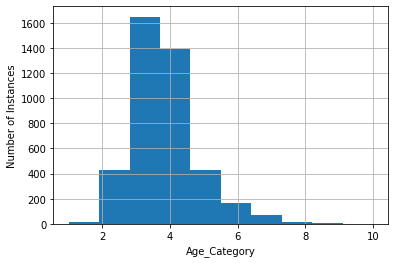

In [10]:
abalone['Age_Category'].hist()
plt.xlabel('Age_Category')
plt.ylabel('Number of Instances')
plt.show()

We have a categorical attribute 'Sex' which takes 3 values Male, Female and Infant. Lets encode these values to numerical values for our analysis.

In [11]:
#https://pbpython.com/categorical-encoding.html
abalone['Sex'] = abalone['Sex'].astype('category')
abalone['Sex'] = abalone['Sex'].cat.codes
abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age_Category
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,3
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,3
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,4
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,3


Male = 2 ; Female = 0 ; Infant=1

In [12]:
abalone.corr()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Sex,1.000000,-0.035915,-0.038762,-0.041796,-0.021219,-0.001205,-0.031873,-0.034686,-0.035076
Length,-0.035915,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,-0.038762,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,-0.041796,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole Weight,-0.021219,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked Weight,-0.001205,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera Weight,-0.031873,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell Weight,-0.034686,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,-0.035076,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


Length, Diameter, Height, Whole weight, Shucked Weight, Viscera Weight, Shell Weight are highly correlated attributes with each other. Shell weight is mostly correlated with Rings(and thus Age category) compared to other attributes. Sex is not correlated to all other attributes and hence can be ignored in our analysis.

In [13]:
abalone_plot = abalone.drop(['Rings','Sex'],axis=1)

C:\Users\kanna\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\kanna\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\kanna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\kanna\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


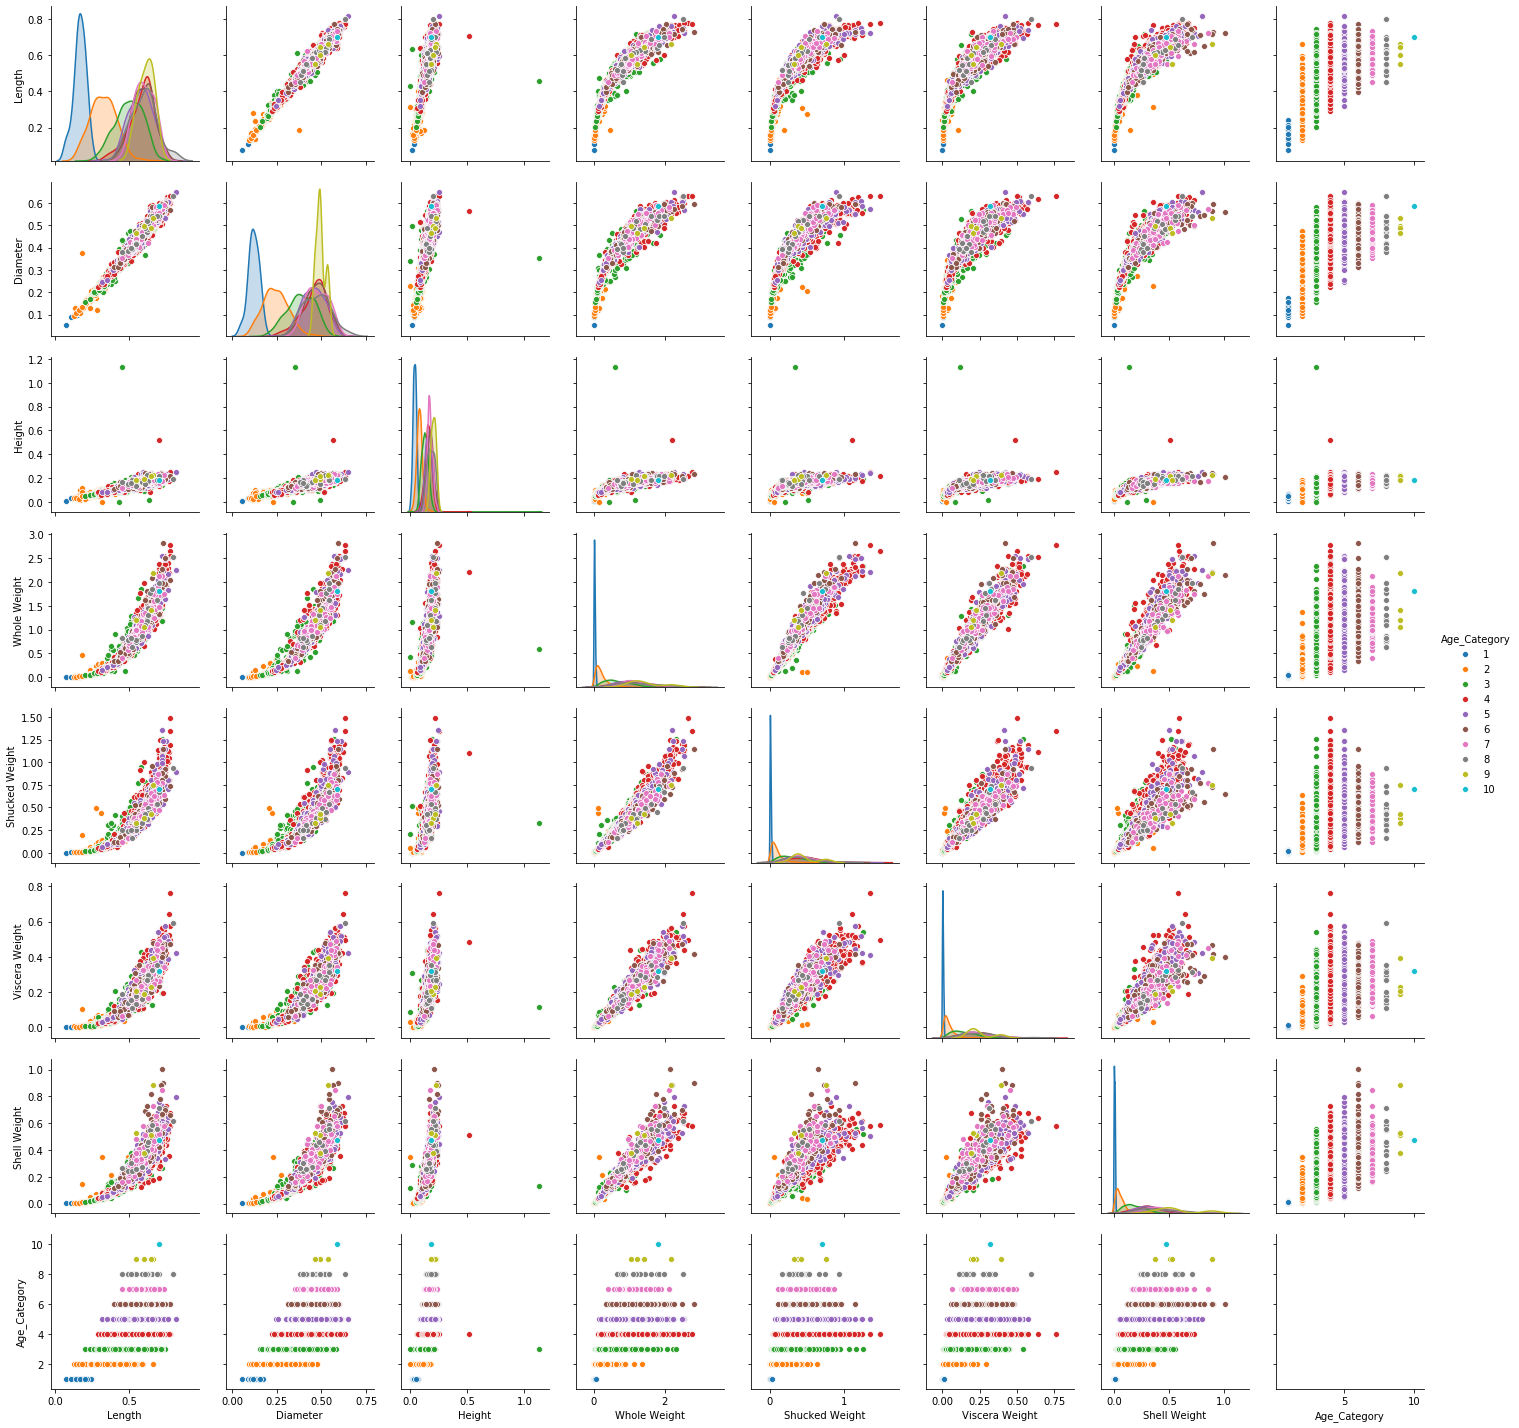

In [14]:
sns.pairplot(abalone_plot, hue="Age_Category")
plt.show()

Attribute paris with Linear covariance : 1. Length, Diameter 2. Whole Weight, Viscera Weight 3. Whole weight, Shell Weight 4. Shucked Weight, Viscera Weight 5. Viscera Weight, Shell Weight <br>
All remaining pairs have non-linear covariance

Splitting the dataset into age defining attributes(abalone_X) and age_categories.

In [15]:
abalone_X = abalone.drop(['Sex','Rings','Age_Category'],axis=1)
abalone_X.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [16]:
abalone_y = abalone['Age_Category']
abalone_y.head()

0    3
1    3
2    4
3    3
4    3
Name: Age_Category, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

<span style="color:red">**Question 12:** </span> **Perform data mining, evaluate your work and report your findings.** This should include code, plots and results you may have generated. If you borrowed code (entirely or partially) from the hands-on projects or anywhere else, clearly provide a link to your source.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.simplefilter(action='ignore', category=Warning)

### Classification 

Exploring different classification techniques on refinded Abalone dataset and their accuracies.

Decision Tree 

In [18]:
dt = DecisionTreeClassifier(max_depth=5)
dt_scores = cross_val_score(dt, abalone_X, abalone_y, cv=50, scoring='accuracy')
[dt_scores.mean(), dt_scores.std()]

[0.5773559176621411, 0.07737715810611581]

KNN Classifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=40)
knn_scores = cross_val_score(knn, abalone_X, abalone_y, cv=50, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.5732976244622204, 0.07144518542987559]

Guassian Naive Bayes Classifier

In [20]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, abalone_X, abalone_y, cv=50, scoring='accuracy')
[nb_scores.mean(), nb_scores.std()]

[0.4874057089757766, 0.131162860893898]

All the three classifiers didn't predict the classes accurately. Let's explore why this is happening by visually examining the data. Since the data is 7 dimensional, lets perform LDA to reduce the dimensionality into 2 dimensions. We cannot use PCA for dimensionality reduction here because classes are involved here. But PCA can be performed to know how many priciple components are contributing to the maximum variance and how the data looks like in reduced dimensions. We will do it after performing LDA.

In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [85]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(abalone_X, abalone_y).transform(abalone_X)

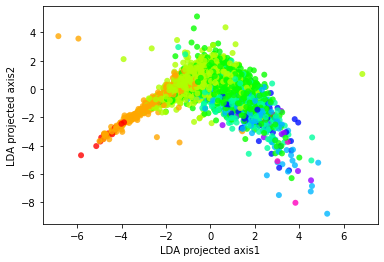

In [87]:
plt.scatter(x=X_r1[:,0],y=X_r1[:,1],edgecolor='none', alpha=0.8,c=abalone_y,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('LDA projected axis1')
plt.ylabel('LDA projected axis2')
plt.show()


We could see a lot of overlaps between classes in data representation. Hence the algorithms failed to accurately classify the ages of abalones. 

Decision tree looks for axis parallel classes which are not found here. <br>
Knn assigns class of most nearest neighbors to the test data point and because of overlapping classes here, it didn't performed well. <br>
GNB assumes that all attributes are independent while detecting class of a datapoint. In our case, we have high dependency between our attributes as observed in correlation matrix above.

Linear , Polynomial and RBF SVMs won't fit in this problem as this is a multiclass problem. 

Let's further reduce the class size of our problem to 3 and perform the above analysis again and observe how these algorithms performed.

New age category size is cut down to 3 ( Young (1-9], Adult(>9 - 12], Old(>12) 

In [27]:
#https://dfrieds.com/data-analysis/bin-values-python-pandas
abalone_new = abalone.drop(['Age_Category','Sex'],axis=1)
abalone_new['Age_Category3'] = pd.cut(x=abalone['Rings']+1.5, bins=[0, 9, 12, abalone['Rings'].max()+1.5], labels=['Young','Adult','Old'])

In [28]:
abalone_new.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings,Age_Category3
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,Young
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,Adult
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,Adult
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,Young
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,Adult


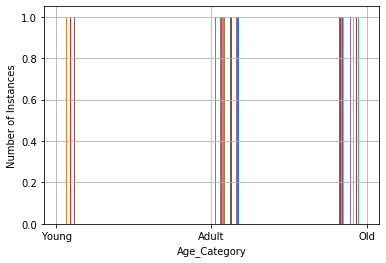

In [88]:
abalone_new['Age_Category3'].hist()
plt.xlabel('Age_Category')
plt.ylabel('Number of Instances')
plt.show()

In [30]:
abalone_nx = abalone_new.drop(['Age_Category3','Rings'],axis=1)
abalone_ny = abalone_new['Age_Category3']

New dataset after splitting into instances and new classes(3 Age categories)

In [31]:
abalone_nx.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [32]:
abalone_ny.head()

0    Young
1    Adult
2    Adult
3    Young
4    Adult
Name: Age_Category3, dtype: category
Categories (3, object): [Young < Adult < Old]

In [33]:
dt = DecisionTreeClassifier(max_depth=6)
dt_scores = cross_val_score(dt, abalone_nx, abalone_ny, cv=50, scoring='accuracy')
[dt_scores.mean(), dt_scores.std()]

[0.6481729032532244, 0.07106144081424999]

In [34]:
knn = KNeighborsClassifier(n_neighbors=40)
knn_scores = cross_val_score(knn, abalone_nx, abalone_ny, cv=50, scoring='accuracy')
[knn_scores.mean(), knn_scores.std()]

[0.6790822627197393, 0.08116864535393174]

In [35]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, abalone_nx, abalone_ny, cv=50, scoring='accuracy')
[nb_scores.mean(), nb_scores.std()]

[0.5833531907990719, 0.1297905780176862]

The classification accuracies have increased by about 20% except Naive Bayes classifier, compared to previous classification problem with 10 age categories. Visual representation after LDA would look like below : 

In [94]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(abalone_nx, abalone_ny).transform(abalone_nx)

In [37]:
# #Converting class labels to digits for plotting data in 2D transformed space
abalone_nyn = abalone_ny.astype('category')
abalone_nyn = abalone_nyn.cat.codes
abalone_nyn.head()

0    0
1    1
2    1
3    0
4    1
dtype: int8

 0 = Young ; 1 = Adult ; 2 = Old

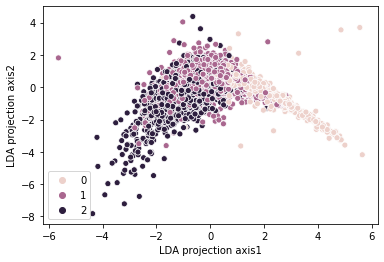

In [140]:
fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=abalone_nyn)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

### Principle Component Analysis

This is just to examine the number of principle components that are capturing most of the variance.

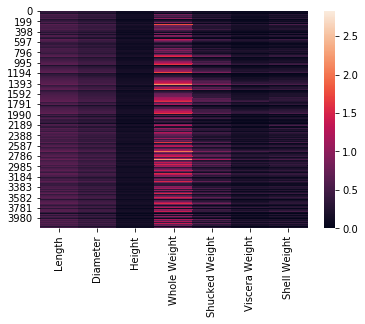

In [39]:
sns.heatmap(abalone_nx)
plt.show()

Computing Covariance Matrix

In [40]:
def mycov(data, col_a, col_b):
    mu = np.mean(data, axis=0) #compute mean
    sum = 0;
    for i in range(0, len(data)):
        sum += ((data[i,col_a] - mu[col_a]) * (data[i,col_b] - mu[col_b]))

    return sum/(len(data)-1)

In [41]:
abalone_nxnp = abalone_nx.to_numpy()

In [42]:
abalone_nxcov = np.empty([np.size(abalone_nxnp,1), np.size(abalone_nxnp,1)]);
for i in range (0, np.size(abalone_nxnp,1)):
    for j in range (i, np.size(abalone_nxnp,1)):
        abalone_nxcov[i,j] = mycov(abalone_nxnp,i,j);
        abalone_nxcov[j,i] = abalone_nxcov[i,j];

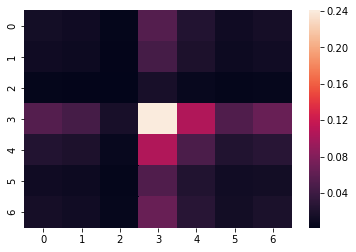

In [43]:
sns.heatmap(abalone_nxcov)
plt.show()

Step 3: Computing Eigenvectors of $\Sigma$

In [44]:
w,v = np.linalg.eig(abalone_nxcov)
w

array([3.38218398e-01, 3.96497925e-03, 2.90837975e-03, 1.05513991e-03,
       1.48143022e-04, 4.89635865e-04, 4.26889687e-04])

In [45]:
v

array([[-1.93156880e-01,  3.50071406e-01, -6.55437574e-01,
        -3.87744533e-02, -6.20247308e-01,  1.55985666e-01,
         5.54390460e-04],
       [-1.59556482e-01,  3.18823644e-01, -5.05459943e-01,
         1.80385971e-02,  7.81401057e-01,  7.46874490e-02,
        -3.02033212e-02],
       [-5.92767802e-02,  1.34749848e-01, -8.61049010e-02,
         4.76650139e-03, -4.75844660e-02, -9.24445752e-01,
        -3.37679936e-01],
       [-8.42619092e-01,  1.88234902e-02,  3.11476005e-01,
        -1.27997922e-01, -6.22182796e-03,  1.67944845e-01,
        -3.84699611e-01],
       [-3.71959978e-01, -7.03430374e-01, -3.37273975e-01,
         3.53785460e-01,  1.25510079e-02, -1.62398001e-01,
         3.18406907e-01],
       [-1.82247946e-01,  1.29464688e-02,  2.50469567e-02,
        -7.62960377e-01,  3.36671186e-02, -2.07342742e-01,
         5.82887383e-01],
       [-2.28348284e-01,  5.12159884e-01,  3.09999021e-01,
         5.23920104e-01, -3.33416971e-02, -1.33868274e-01,
         5.4399013

In [46]:
np.matmul(v,  np.transpose(v))

array([[ 1.00000000e+00,  1.30894373e-15, -3.05663697e-16,
        -2.25183370e-15,  2.94474731e-15,  8.52128697e-16,
         3.94546592e-15],
       [ 1.30894373e-15,  1.00000000e+00,  1.90819582e-17,
         2.14411822e-15, -3.78516662e-15, -1.28369537e-15,
        -3.33760797e-15],
       [-3.05663697e-16,  1.90819582e-17,  1.00000000e+00,
         1.30451205e-15, -1.16573418e-15, -2.49800181e-15,
        -1.74860126e-15],
       [-2.25183370e-15,  2.14411822e-15,  1.30451205e-15,
         1.00000000e+00,  7.07767178e-16,  1.33226763e-15,
         2.49800181e-16],
       [ 2.94474731e-15, -3.78516662e-15, -1.16573418e-15,
         7.07767178e-16,  1.00000000e+00, -1.08246745e-15,
         2.77555756e-16],
       [ 8.52128697e-16, -1.28369537e-15, -2.49800181e-15,
         1.33226763e-15, -1.08246745e-15,  1.00000000e+00,
        -8.88178420e-16],
       [ 3.94546592e-15, -3.33760797e-15, -1.74860126e-15,
         2.49800181e-16,  2.77555756e-16, -8.88178420e-16,
         1.0000000

Variance captured by different principle components 

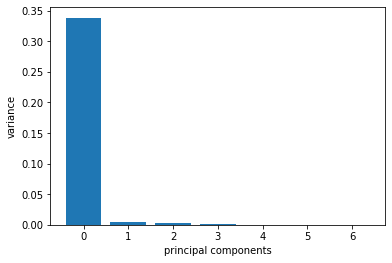

In [47]:
plt.bar(np.arange(7),w)
plt.xlabel('principal components')
plt.ylabel('variance')
plt.show()

Most of the variance has been captured by the first principle component itself. Cumulative variance that has been captured by principle components and it respective plot is shown below:

In [48]:
np.cumsum(w)/np.sum(w)

array([0.97409888, 0.98551837, 0.99389476, 0.99693366, 0.99736033,
       0.99877052, 1.        ])

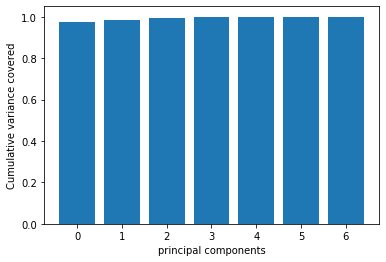

In [49]:
plt.bar(np.arange(7),np.cumsum(w)/np.sum(w))
plt.xlabel('principal components')
plt.ylabel('Cumulative variance covered')
plt.show()

To visualize the data, selecting first 2 principle components and projecting the data into new 2 dimensional space. 

In [50]:
projected_data = np.matmul(abalone_nxnp,v[:,0:2])

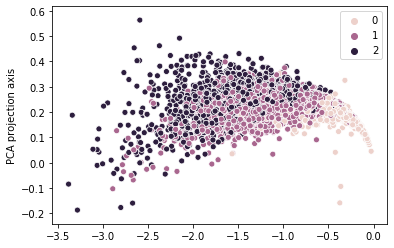

In [111]:
fig = sns.scatterplot(projected_data[:, 0], projected_data[:, 1],hue=abalone_nyn)
plt.ylabel('PCA projection axis')
plt.show(fig)

### Clustering 

Examining how clustering algorithms work for this 3 class problem. 

In [52]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples


In [53]:
from scipy.special import comb
def rand_index(S, T):

    Spairs = comb(np.bincount(S), 2).sum()
    Tpairs = comb(np.bincount(T), 2).sum()
    
    A = np.c_[(S, T)]
    
    f_11 = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(S))
    
    f_10 = Spairs - f_11
    f_01 = Tpairs - f_11
    f_00 = comb(len(A), 2) - f_11 - f_10 - f_01
    return (f_00 + f_11) / (f_00 + f_01 + f_10 + f_11)

### K-Means 

In [54]:
kmeans = KMeans(n_clusters=3, random_state=10);
y_pred1 = kmeans.fit_predict(abalone_nx)

In [115]:
 print(rand_index(abalone_nyn,y_pred1))

0.6008882235528942


Visualizing this predicted data by projecting it into 2D space using LDA would look like below : 

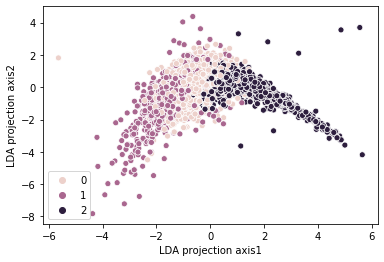

In [141]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(abalone_nx, abalone_ny).transform(abalone_nx)

fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=y_pred1)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

We could observe a good bunch of 3 clusters representing 3 age categories

In [58]:
def silhouette(X,labels):
    n_clusters=np.size(np.unique(labels));
    sample_silhouette_values=silhouette_samples(X,labels)
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values=sample_silhouette_values[labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i=ith_cluster_silhouette_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_clusters)
        plt.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7)# Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05,y_lower+0.5*size_cluster_i,str(i))#Compute the new y_lower for next cluster
        y_lower=y_upper+10# 10 for the 0 samples
    plt.title("Silhouette plot for the various clusters.")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

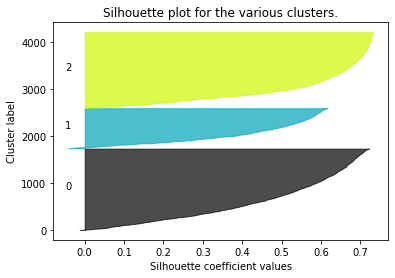

In [59]:
silhouette(abalone_nx,y_pred1)

Age categories Young and Old were represented to some extent accurately, but Adult category(which has majority data instances) was not represented as a good cluster.

### Agglomerative Clustering

Agglomerative clustering is expected to completely fail in this case makes the Agglomerative alogrithms to treat most of the data points as a single cluster. The same can be observed below for Single-Link, Complete Link and Average link.

#### Single Link

In [102]:
single_linkage = AgglomerativeClustering(linkage="single", n_clusters=3)
y_pred2 = single_linkage.fit_predict(abalone_nx)
print(rand_index(abalone_nyn,y_pred2))

0.36535549590474226


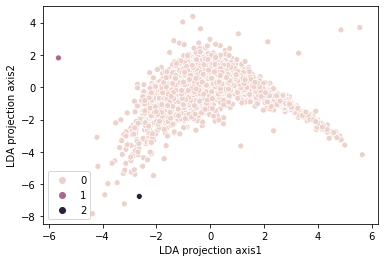

In [117]:
fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=y_pred2)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

#### Complete Link

In [62]:
complete_linkage = AgglomerativeClustering(linkage="complete", n_clusters=3)
y_pred3 = single_linkage.fit_predict(abalone_nx)
print(rand_index(abalone_nyn,y_pred3))

0.36535549590474226


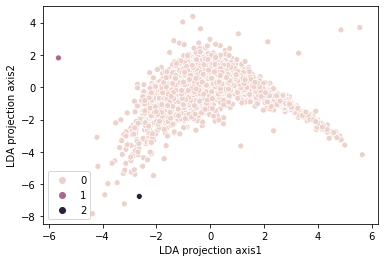

In [118]:
fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=y_pred3)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

#### Average Link

In [64]:
complete_linkage = AgglomerativeClustering(linkage="average", n_clusters=3)
y_pred4 = single_linkage.fit_predict(abalone_nx)
print(rand_index(abalone_nyn,y_pred4))

0.36535549590474226


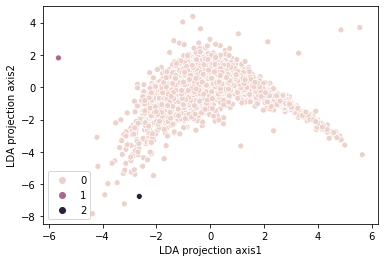

In [119]:
fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=y_pred4)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

#### DBScan

DBScan will also fail in this case since age categories in our data is not represented as good clusters. 

In [138]:
dbscan = DBSCAN(eps=0.08, min_samples=50)
y_pred5 = dbscan.fit_predict(abalone_nx)
y_pred55 = [20 if x == -1 else x for x in y_pred5]
print('Rand Index :  %.8f' % rand_index(abalone_nyn,y_pred55))


Rand Index :  0.44073795


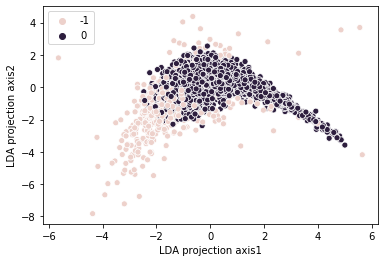

In [139]:
fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=y_pred5)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

Rand index for the above given eps-minsamples combination is the best of the different combinations that have been tried. Most of the data is being treated as noise while clustering.

#### Spectral Clustering

In [127]:
spectral = SpectralClustering(n_clusters=3, random_state=10)
y_pred6 = spectral.fit_predict(abalone_nx)
print('Rand Index :  %.8f' % rand_index(abalone_nyn,y_pred6))


Rand Index :  0.58728497


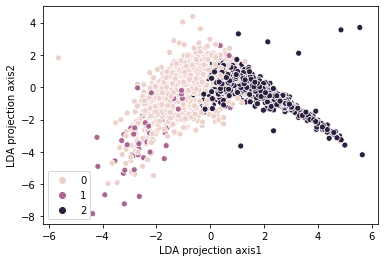

In [128]:
fig = sns.scatterplot(x=X_r1[:,0],y=X_r1[:,1],hue=y_pred6)
plt.xlabel('LDA projection axis1')
plt.ylabel('LDA projection axis2')
plt.show(fig)

This is best performed algorithm next to K-means clustering. 

## Analysis on attribute contribution to clustering performance

Of all the clustering algorithms above, K-means performed well comparitively. Analysing which attribute contributed most for algorithm performance might help in eliminating few attributes which are of no use. <br>
Actual K-means accuracy = 0.6008882235528942

In [68]:
abalone_nxp1 = abalone_nx.drop(['Length'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_preda = kmeans.fit_predict(abalone_nxp1)
print(rand_index(abalone_nyn,y_preda))

0.597774795237112


In [69]:
abalone_nxp2 = abalone_nx.drop(['Diameter'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_predb = kmeans.fit_predict(abalone_nxp2)
print(rand_index(abalone_nyn,y_predb))

0.5979698075114139


In [70]:
abalone_nxp3 = abalone_nx.drop(['Height'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_predc = kmeans.fit_predict(abalone_nxp3)
print(rand_index(abalone_nyn,y_predc))

0.5986169041227889


In [71]:
abalone_nxp4 = abalone_nx.drop(['Whole Weight'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_predc = kmeans.fit_predict(abalone_nxp4)
print(rand_index(abalone_nyn,y_predc))

0.6088751233165852


In [72]:
abalone_nxp5 = abalone_nx.drop(['Shucked Weight'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_predc = kmeans.fit_predict(abalone_nxp5)
print(rand_index(abalone_nyn,y_predc))

0.60232638171932


In [73]:
abalone_nxp6 = abalone_nx.drop(['Viscera Weight'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_predc = kmeans.fit_predict(abalone_nxp6)
print(rand_index(abalone_nyn,y_predc))

0.6017010805974259


In [74]:
abalone_nxp7 = abalone_nx.drop(['Shell Weight'],axis=1) 
kmeans = KMeans(n_clusters=3, random_state=10);
y_predc = kmeans.fit_predict(abalone_nxp7)
print(rand_index(abalone_nyn,y_predc))

0.5984592883199119


By removing each attribute from the actual dataset, the accuracy has not been affected much. Hence all the attributes are contributing for the clustering accuracy. This can be related to the correlation of dataset that is discussed earlier in this notebook(all attributes are highly correlated with each other).

<span style="color:red">**Question 13:** </span> Putting your findings in the context of your goal and evaluation plan, do you consider yourself successful? Provide reasons for your success or lack thereof.

I am really interested in finding how the clustering algorithms behave in categorizing the abalones. Ideally if the data is supported, the clusters should represent age categories. But due to the nature of data, it is not possible. K-means performed significantly well compared to all others but not completely accurate in categorizing abalones based on their age group. I would say that this approach to predict age category of abalones using clustering is not a successful approach.

<span style="color:red">**Question 14:** </span> If you have an extra month to work on this project, what else would you do? Provide reasons.

1. I could have done better in representing physical measurements of abalones such that they give exact clusters representing their age categories(but this is not guaranteed even after data manipulation). Also I could have done better in visually representing the data<br>

2. I would have known more about abalones in particular and explored if there are any relationships between physical measurements and gender/geographical location/price etc. To be specific, given physical measurements, can we predict the geographical location of abalone(abalones from a certain location might have more value than others) or can we determine the gender of abalone or estimate the price of abalone or estimate the ornament/jewellery that can be made using certain abalones.<br>

3. I have started this project to first work on dow jones index dataset and started digging into the domain aspects of that dataset. My thought is to evaluate different stock performances over certain period of time and to determine good/bad stock with respect to user who is buying it(and his financial limitations). For example: Stock A has a price of USD 1000 and is performing consistently, Stock B price is USD 100 and is performing better than stock A. The return on A will be more obviously, but it is not in reach of most sections of society. I would treat Stock B as best in this case. Few such assumptions can be made to determine which stock is good/bad. How much money one might have made if he/she purchased a stock at certian point of time etc. But, I couldn't formulate exact selection criteria since there are a lot of factors to consider to predict whether a stock is good or bad. I will try my best to do this as a self-exercise later on.

<span style="color:red">**Question 15:** </span> Do you consider this project to be in the 'innovative category' or a 'good application' category? Provide your reason. 

If I could somehow manage to do the above said goal(regarding dow jones index dataset), I would have considered it to be 'Innovative category'. I would consider the analysis that I made here using abalone dataset as 'good application' category since I've explored the existing algorithms discussed in lectures on abalone dataset. 

Finally, I would like to Thank you for giving an opportunity to explore different domains by means of these datasets. One can gain lot of insights by exploring different datasets of UCI Machine learning repository.

 